In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
data = pd.read_csv('employee_data.csv')

df = pd.DataFrame(data)
df.tail()

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,JobSatisfaction,Attrition
195,1196,40,Male,IT,Analyst,52688.84,3,1,1,Yes
196,1197,29,Female,Finance,Clerk,44781.82,13,1,3,No
197,1198,25,Female,Sales,Executive,43217.18,1,4,2,No
198,1199,56,Male,Finance,Analyst,58640.30,9,2,2,No
199,1200,34,Female,HR,Analyst,61120.77,5,1,4,Yes


# Explore Dataset

In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (200, 10)


In [5]:
df.shape

(200, 10)

In [6]:
df.dtypes

EmployeeID           int64
Age                  int64
Gender              object
Department          object
JobRole             object
MonthlyIncome      float64
YearsAtCompany       int64
WorkLifeBalance      int64
JobSatisfaction      int64
Attrition           object
dtype: object

In [7]:
df

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,JobSatisfaction,Attrition
0,1001,53,Female,Finance,Executive,32102.13,0,4,1,No
1,1002,33,Male,HR,Executive,61609.87,1,2,4,Yes
2,1003,39,Female,Finance,Executive,46886.87,6,4,4,No
3,1004,28,Female,Sales,Executive,37200.25,13,2,2,No
4,1005,45,Male,Sales,Analyst,61367.89,6,2,2,Yes
...,...,...,...,...,...,...,...,...,...,...
195,1196,40,Male,IT,Analyst,52688.84,3,1,1,Yes
196,1197,29,Female,Finance,Clerk,44781.82,13,1,3,No
197,1198,25,Female,Sales,Executive,43217.18,1,4,2,No
198,1199,56,Male,Finance,Analyst,58640.30,9,2,2,No


# Attrition by Department

### Insight: Find out if low income correlates with high attrition later.

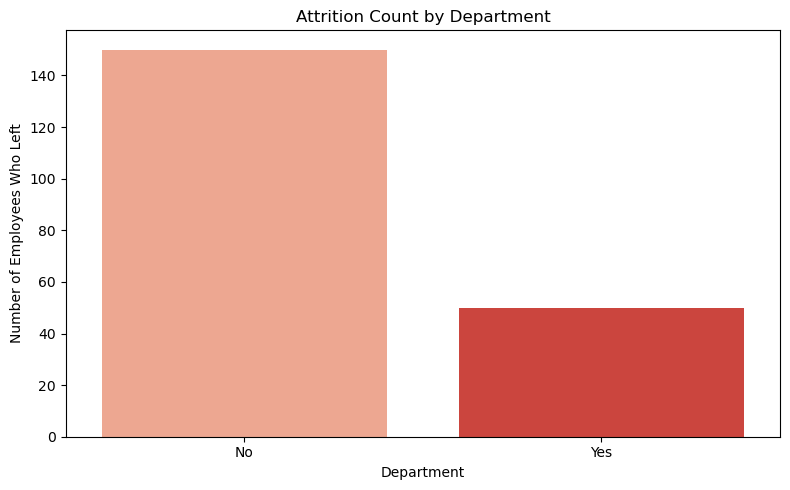

In [8]:
# Grouping data to count attrition by department
attrition_counts = df.groupby('Attrition')['Department'].size().reset_index(name='Attrition Count')
attrition_counts.columns = ['Department', 'Attrition Count']

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=attrition_counts, x='Department', y='Attrition Count', palette='Reds')
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Who Left')
plt.tight_layout()
plt.show()

# Monthly Income Distribution

### Insight: Find out if low income correlates with high attrition later.

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


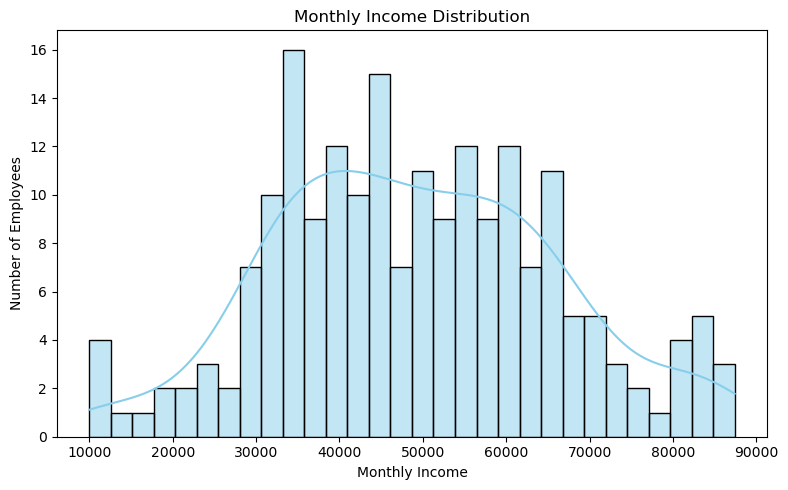

In [9]:
# Step 1: Plot Monthly Income Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='skyblue')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

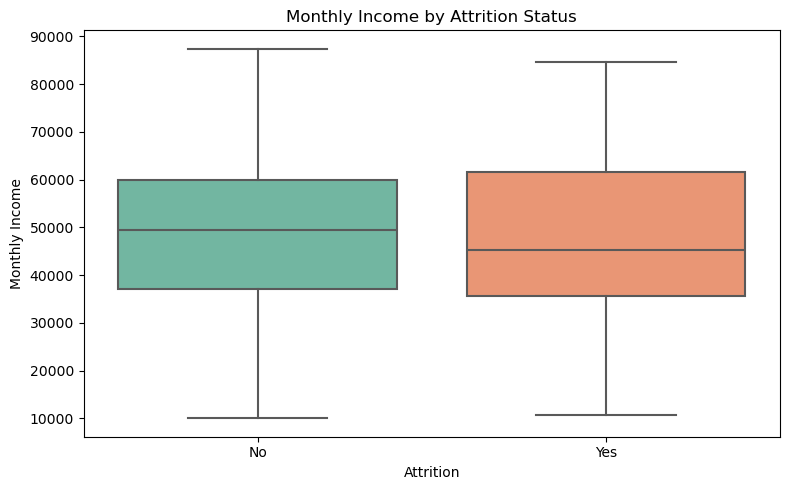

In [10]:
# Step 2: Compare Monthly Income of Attrited vs Non-Attrited Employees

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set2')
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()

# Job Satisfaction vs Attrition

### Insight: Are dissatisfied employees more likely to leave?

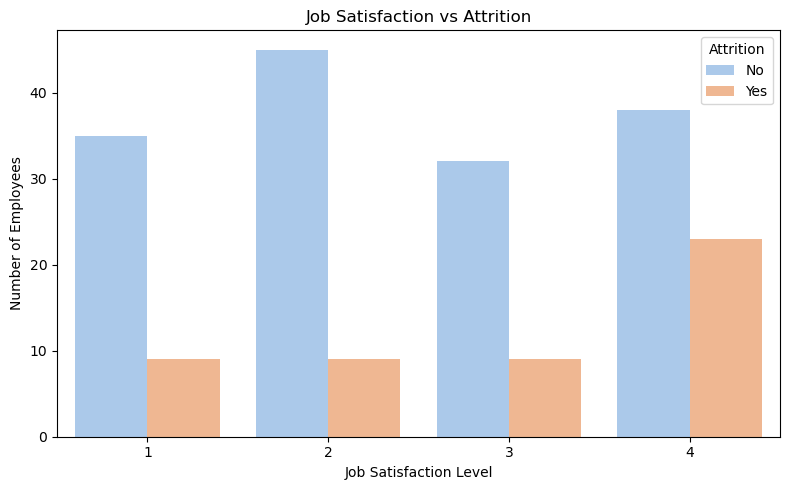

In [11]:
# Plot: Job Satisfaction vs Attrition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='pastel')

plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Bonus: Deeper Insights (Optional)

### 1. Attrition vs Years at Company
### 2. Gender-Based Attrition
### 3. Income vs Work-Life Balance

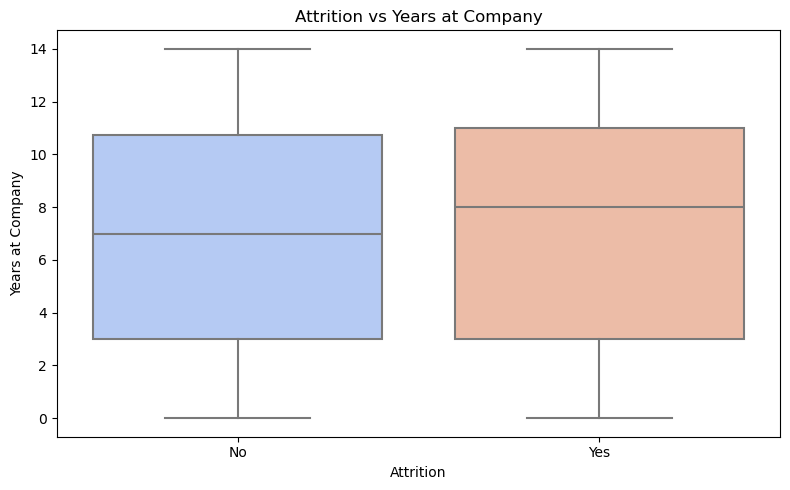

In [12]:
# 1. Attrition vs Years at Company

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', palette='coolwarm')
plt.title('Attrition vs Years at Company')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.tight_layout()
plt.show()

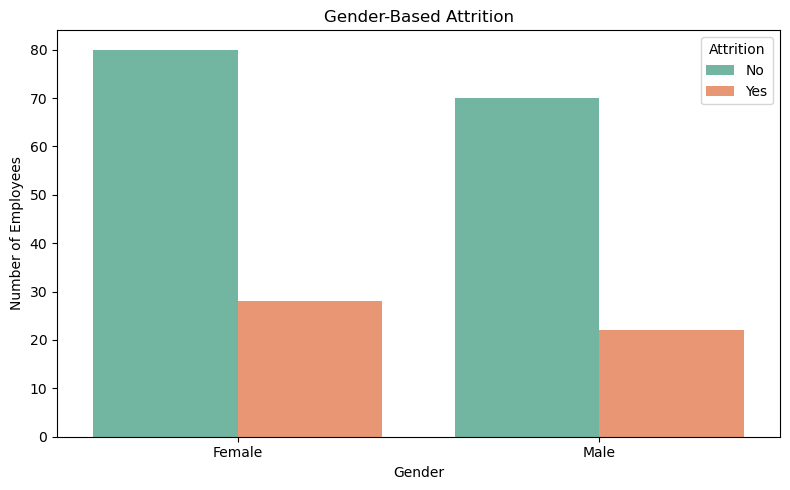

In [13]:
# 2. Gender-Based Attrition

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set2')
plt.title('Gender-Based Attrition')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

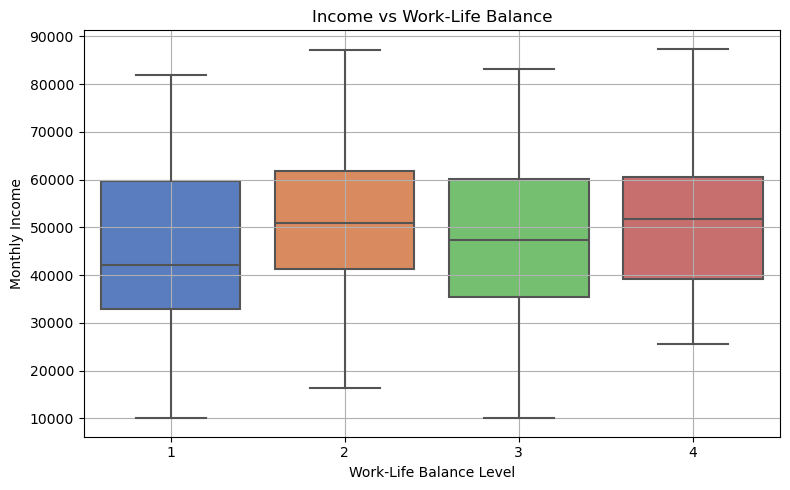

In [14]:
# 3. Income vs Work-Life Balance

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='WorkLifeBalance', y='MonthlyIncome', palette='muted')
plt.title('Income vs Work-Life Balance')
plt.xlabel('Work-Life Balance Level')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.tight_layout()
plt.show()

# Document Your Findings

### 1. Department with Highest Attrition

#### ~ HR had the highest number of employees leaving the organization.

### 2. Factors Contributing to Attrition

#### ~ Low Job Satisfaction was strongly correlated with higher attrition. Employees with satisfaction scores of 1 or 2 were more likely to leave.
#### ~ Poor Work-Life Balance (scores of 1 or 2) also showed a trend of increased attrition, indicating employees may feel overworked or stressed.

### 3. High-Risk Employee Segments

#### ~ Employees with fewer than 2 years at the company had a higher tendency to leave, showing a risk in early retention.
#### ~ Lower-income employees also showed a higher attrition rate, potentially due to dissatisfaction or better opportunities elsewhere.

### Business Recommendations

#### ~ Focus on improving job satisfaction through regular feedback, recognition, and engagement initiatives.
#### ~ Encourage better work-life balance, especially in high-turnover departments.
#### ~ Implement targeted retention strategies for new joiners and lower-income segments.

In [ ]:
attrition_counts = df.groupby('Department')['Attrition'].value_counts()
attrition_counts